<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/Startup_Success_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders
#pachkage that we need for finding missing values percentage
!pip install autoviz

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import L1,L2



In [ ]:
data = pd.read_csv('data.csv', encoding = "ISO-8859-1")

# Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB


In [ ]:
#analyzing columns of data
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(data)
%matplotlib inline

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Company_Name,object,0.000000,100,,,Possible ID column: drop before modeling step.
Dependent-Company Status,object,0.000000,0,,,No issue
year of founding,object,0.000000,3,,,"6 rare categories: ['2000', '2002', '2003', '2004', '1999', '1997']. Group them into a single category or drop the categories."
Age of company in years,object,9.322034,3,,,"44 missing values. Impute them with mean, median, mode, or a constant value such as 123., 6 rare categories: ['14', '12', '11', '10', '15', '17']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
Internet Activity Score,float64,13.771186,NA,-725.000000,1535.000000,"65 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 22 outliers greater than upper bound (545.25) or lower than lower bound(-332.75). Cap them or remove them."
Short Description of company profile,object,31.567797,66,,,"149 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 313 unique values: Use hash encoding or text embedding to reduce dimension."
Industry of company,object,26.271186,40,,,"124 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,, Possible high cardinality column with 192 unique values: Use hash encoding or text embedding to reduce dimension."
Focus functions of company,object,6.355932,34,,,"30 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 164 unique values: Use hash encoding or text embedding to reduce dimension."
Investors,object,29.661017,67,,,"140 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 319 unique values: Use hash encoding or text embedding to reduce dimension."
Employee Count,float64,35.169492,NA,0.000000,594.000000,"166 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 30 outliers greater than upper bound (71.12) or lower than lower bound(-35.88). Cap them or remove them."


<Axes: xlabel='Dependent-Company Status', ylabel='count'>

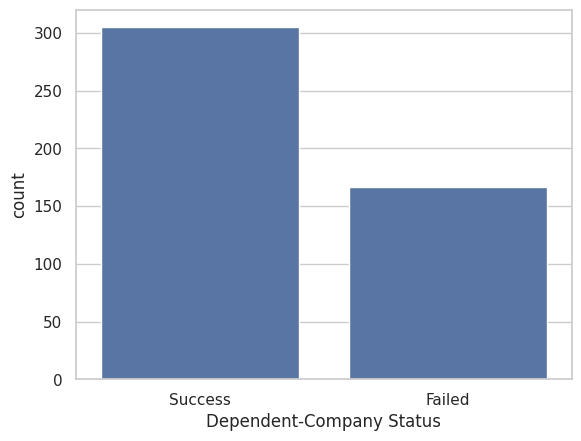

In [ ]:
sns.countplot(x='Dependent-Company Status', data=data)

In [ ]:
#getting column names that have some empty values
for i in data.columns:
    if data[i].isnull().any():
        nullperc = data[i].isnull().sum()/data.shape[0] * 100
        print(f'null percentage of {i} is {round(nullperc,ndigits=3)}')

null percentage of Age of company in years is 9.322
null percentage of Internet Activity Score is 13.771
null percentage of Short Description of company profile is 31.568
null percentage of Industry of company is 26.271
null percentage of Focus functions of company is 6.356
null percentage of Investors is 29.661
null percentage of Employee Count is 35.169
null percentage of Employees count MoM change is 43.432
null percentage of Has the team size grown is 10.593
null percentage of Est. Founding Date is 23.093
null percentage of Last Funding Date is 25.847
null percentage of Last Funding Amount is 33.898
null percentage of Country of company is 15.042
null percentage of Continent of company is 15.042
null percentage of Specialization of highest education is 20.551
null percentage of Industry trend in investing is 17.373
null percentage of Gartner hype cycle stage is 36.441
null percentage of Time to maturity of technology (in years) is 36.441


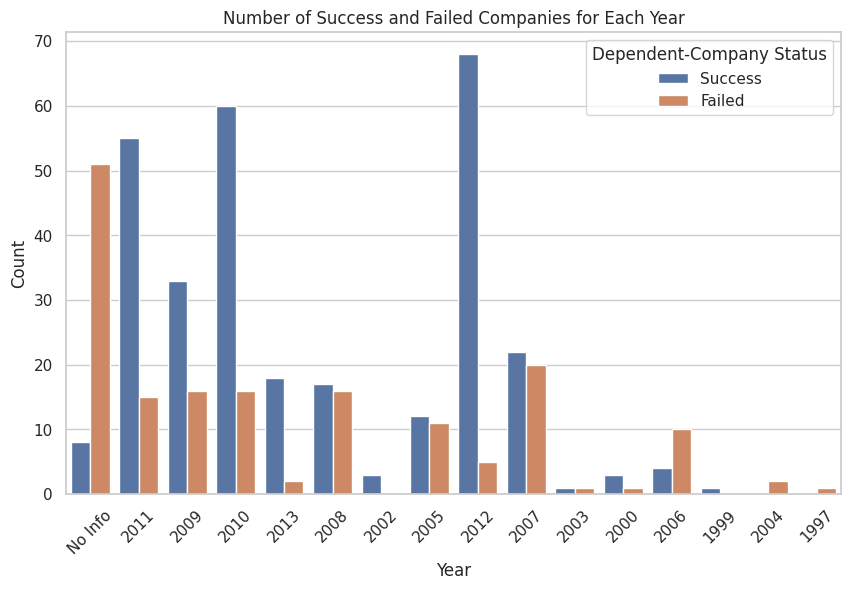

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='year of founding', hue='Dependent-Company Status', data=data)

plt.title('Number of Success and Failed Companies for Each Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

Before the year 2009, the number of successful and failed companies was approximately equal. However, starting from 2009, there has been a notable disparity, with successful companies outnumbering failed ones by a significant margin.



---



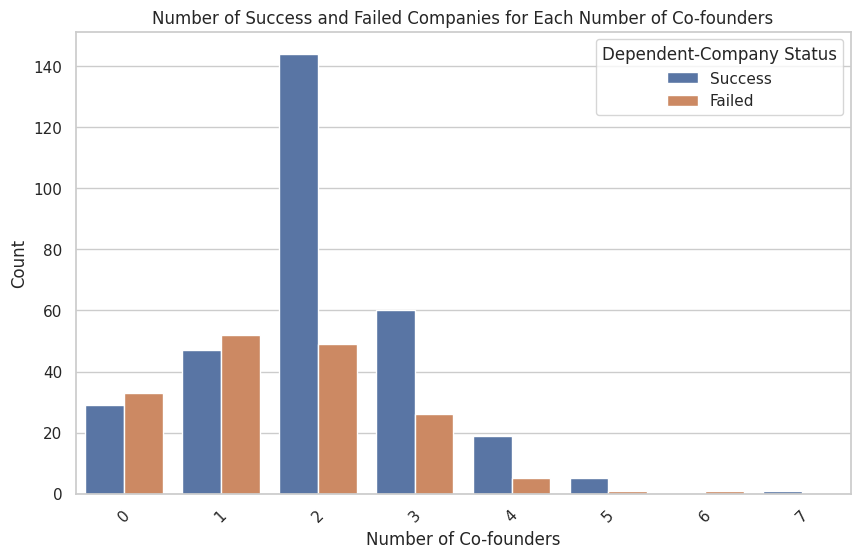

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Number of Co-founders', hue='Dependent-Company Status', data=data)

plt.title('Number of Success and Failed Companies for Each Number of Co-founders')
plt.xlabel('Number of Co-founders')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

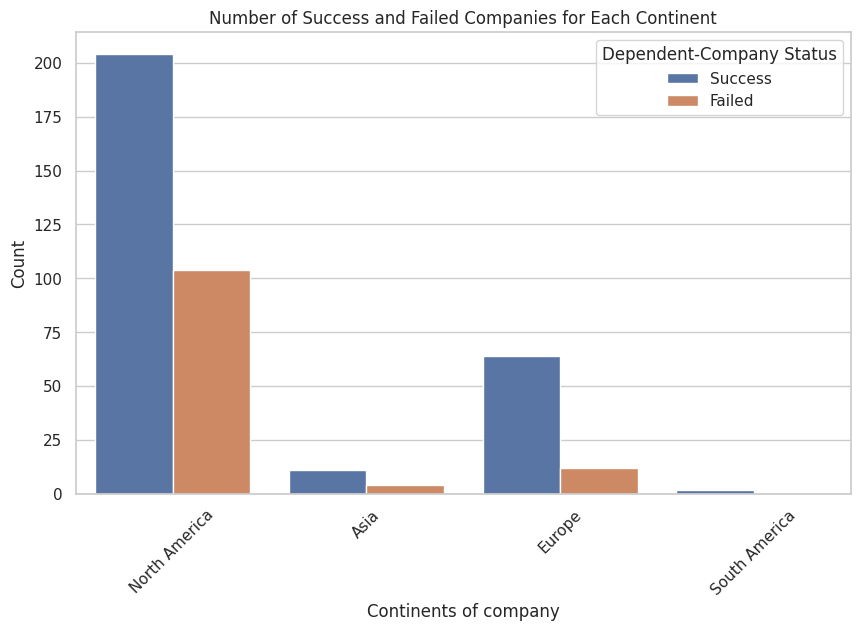

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent of company', hue='Dependent-Company Status', data=data)
plt.title('Number of Success and Failed Companies for Each Continent')
plt.xlabel('Continents of company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

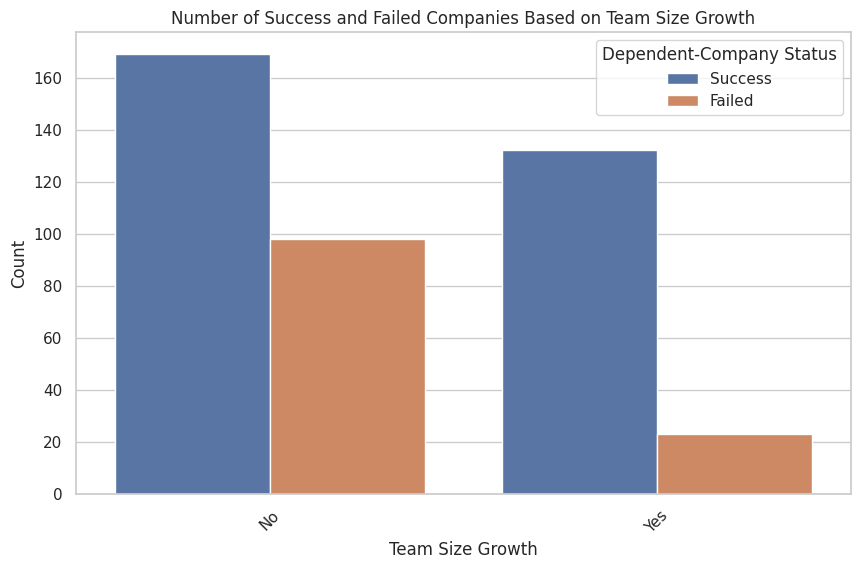

In [ ]:
data['Has the team size grown'] = data['Has the team size grown'].replace({'yes': 'Yes', 'YES': 'Yes', 'No Info': 'No'})
plt.figure(figsize=(10, 6))
sns.countplot(x='Has the team size grown', hue='Dependent-Company Status', data=data)
plt.title('Number of Success and Failed Companies Based on Team Size Growth')
plt.xlabel('Team Size Growth')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

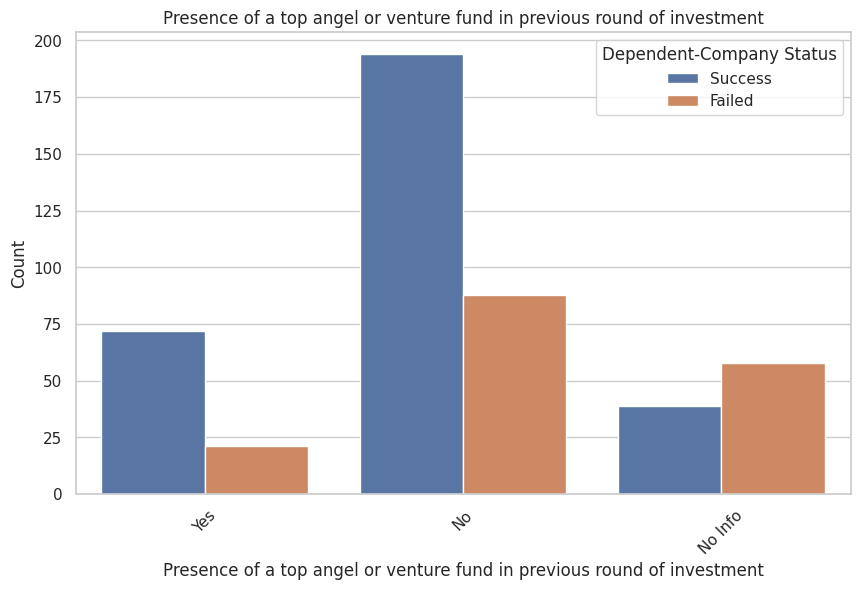

In [ ]:
data['Presence of a top angel or venture fund in previous round of investment'] = data['Presence of a top angel or venture fund in previous round of investment'].replace({'yes': 'Yes', 'YES': 'Yes'})
plt.figure(figsize=(10, 6))
sns.countplot(x='Presence of a top angel or venture fund in previous round of investment', hue='Dependent-Company Status', data=data)
plt.title('Presence of a top angel or venture fund in previous round of investment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

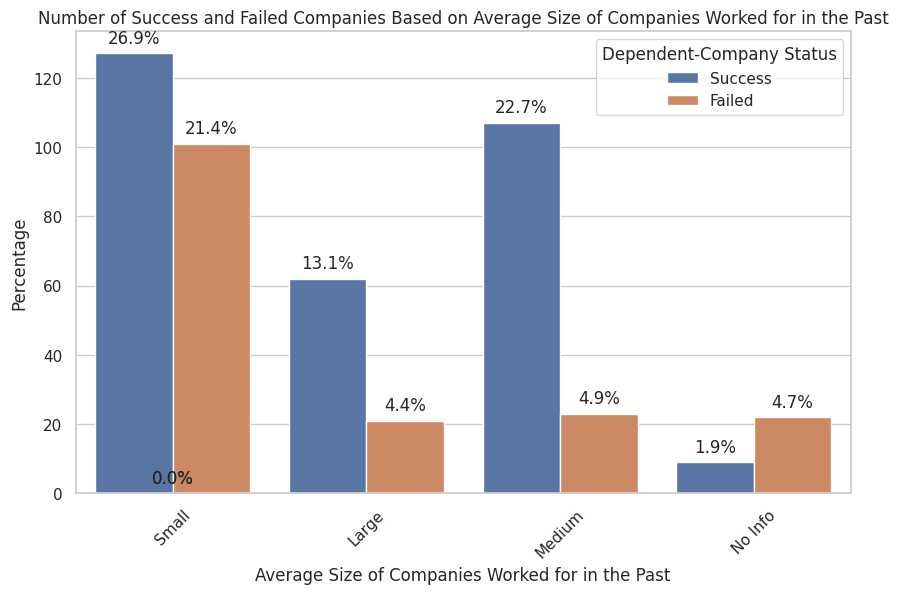

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Average size of companies worked for in the past', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Number of Success and Failed Companies Based on Average Size of Companies Worked for in the Past')
plt.xlabel('Average Size of Companies Worked for in the Past')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


The analysis of past work experiences' average company size shows interesting differences between successful and failed companies. For instance, about 26.9% of successful companies have worked for smaller companies, compared to only   21.4% of failed ones. Additionally, around 13.1% of successful companies have experience with larger companies, while only 4.4% of failed ones do. These differences suggest that successful ventures often have more diverse experiences across company sizes.





---



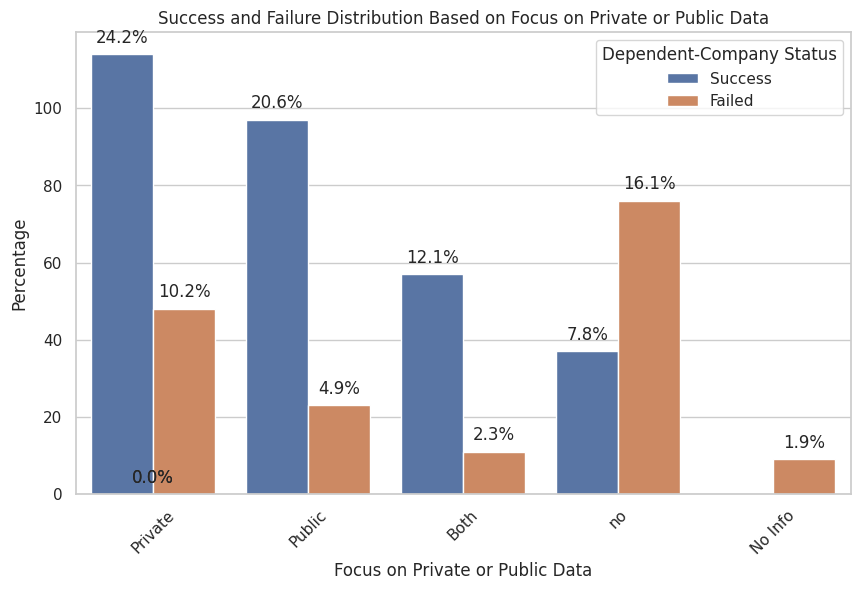

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Focus on private or public data?', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Focus on Private or Public Data')
plt.xlabel('Focus on Private or Public Data')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The analysis of data focus shows interesting differences between successful and failed companies. For instance, about 24.2% of successful companies focus on private data, compared to only 10.2% of failed ones. Conversely, approximately 20.6% of successful companies concentrate on public data, while only 4.9% of failed companies do. Additionally, 12.1% of successful companies have a dual focus on both private and public data, contrasting with only 2.3% among failed companies. Interestingly, a smaller proportion of successful ventures, around 7.8%, don't prioritize either private or public data, while this percentage is higher at 16.1% for failed companies. These findings suggest that data focus strategies may impact company success, with successful ventures often prioritizing private or public data strategies, or a combination thereof, while failed companies have a broader diversity in data focus approaches.










---



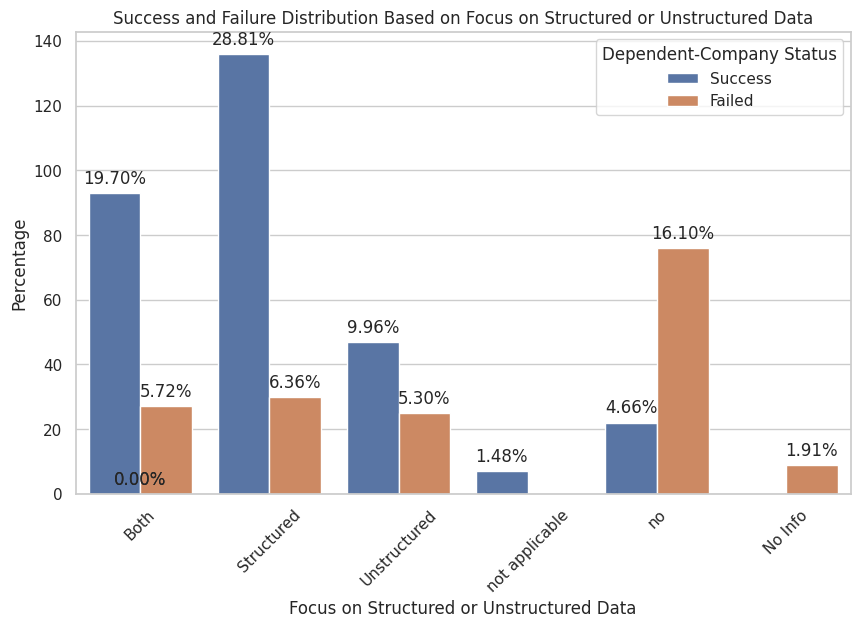

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Focus on structured or unstructured data', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Focus on Structured or Unstructured Data')
plt.xlabel('Focus on Structured or Unstructured Data')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The analysis of structured or unstructured data focus reveals significant differences in company strategies. Successful companies predominantly focus on structured data (28.81%), in contrast to failed companies (6.36%). Conversely, the emphasis on unstructured data is higher among successful ventures (10%) compared to failed ones (5.3%). Moreover, a considerable proportion of successful companies (19.7%) adopt a dual focus on both structured and unstructured data, contrasting with a smaller percentage among failed companies (5.7%). Additionally, fewer successful ventures (4.66%) opt for neither structured or unstructured data focus, while this percentage is notably higher for failed companies (16.1%). Finally, a small fraction of successful companies (1.48%) indicate that the question is not applicable, while there are no corresponding failed companies in this category. These findings suggest that data structure strategies may significantly impact company success, with successful ventures often prioritizing structured or unstructured data strategies, or a combination thereof, while failed companies exhibit a broader diversity in data structure approaches.



---



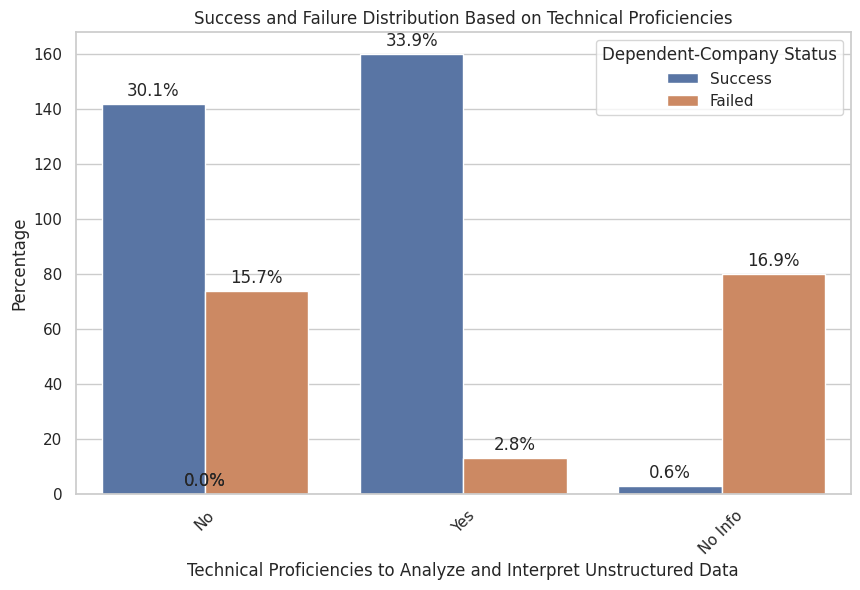

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Technical proficiencies to analyse and interpret unstructured data', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Technical Proficiencies')
plt.xlabel('Technical Proficiencies to Analyze and Interpret Unstructured Data')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The study of technical skills for handling unstructured data shows big differences between successful and failed companies. About 33.9% of successful companies have these skills, much more than the 2.8% of failed ones. On the other hand, approximately 30.1% of successful companies lack these skills, while it's higher at 15.7% for failed companies. These results highlight how important it is for companies to have the right technical abilities to deal with unstructured data, which can greatly impact their success in making decisions and coming up with new ideas.



---



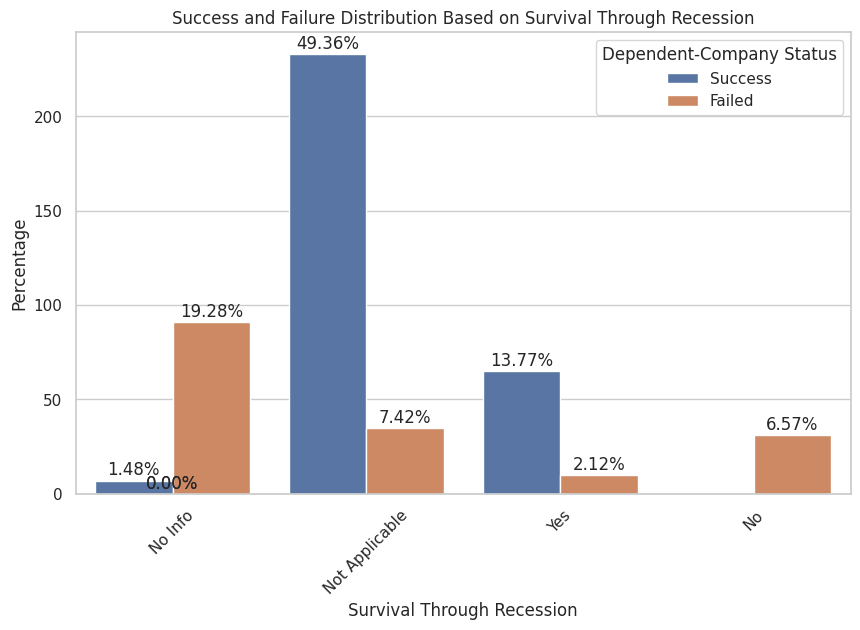

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Survival through recession, based on existence of the company through recession times', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Survival Through Recession')
plt.xlabel('Survival Through Recession')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

This shows if a company survived during times of recession.



---



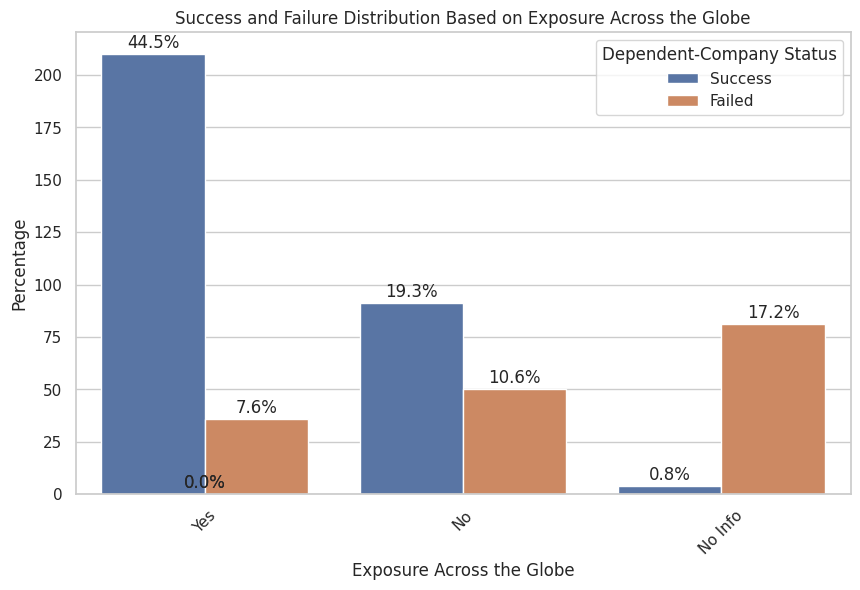

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Exposure across the globe', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Exposure Across the Globe')
plt.xlabel('Exposure Across the Globe')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The analysis of global exposure shows big differences between successful and failed companies. About 44.5% of successful companies operate globally, much higher than the 7.6% of failed ones. On the other hand, 19.3% of successful companies don't operate globally, compared to 10.6% of failed ones. This highlights the importance of global presence for success, indicating that successful companies tend to expand worldwide, while failed ones often have more limited international strategies.



---



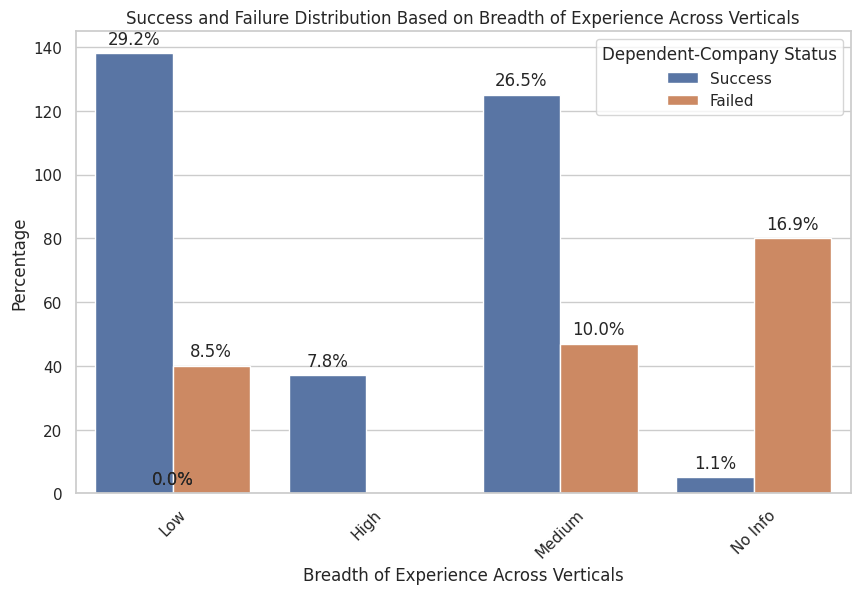

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Breadth of experience across verticals', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Breadth of Experience Across Verticals')
plt.xlabel('Breadth of Experience Across Verticals')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

These findings emphasize the importance of having a broad range of experience across verticals for company success and highlight the risks associated with limited experience in diverse domains.



---



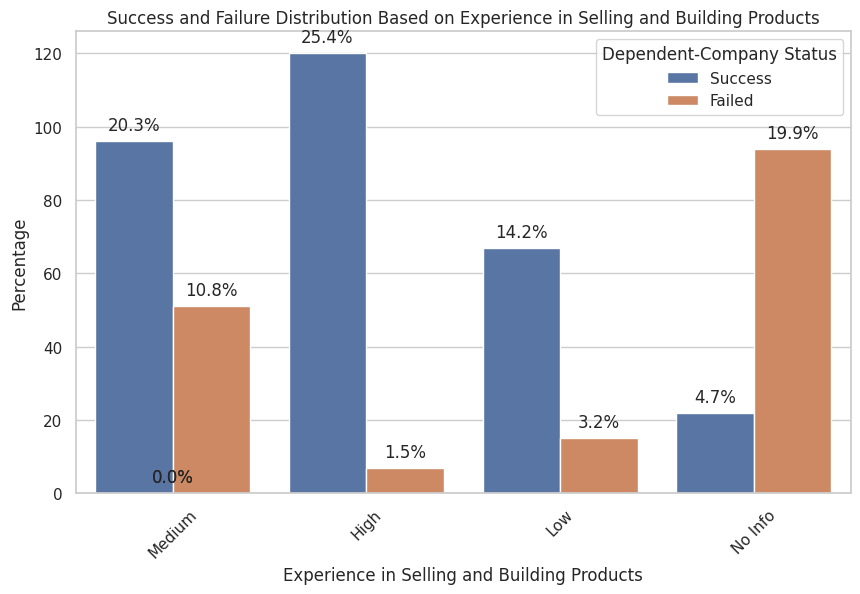

In [ ]:
data["Experience in selling and building products"] = data["Experience in selling and building products"].replace({"None": "No Info"})
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Experience in selling and building products', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Experience in Selling and Building Products')
plt.xlabel('Experience in Selling and Building Products')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The "Experience in selling and building products" reveals how skilled individuals are in selling and building products.

Our analysis shows:

High Experience: Roughly 25.4% of successful companies and 1.5% of failed companies have high experience. Successful companies notably excel in this area compared to failed ones.

Low Experience: About 14.2% of successful companies and 3.2% of failed companies have low experience. Though both have fewer instances, failed companies show a higher proportion.

Medium Experience: Around 20.3% of successful companies and 10.8% of failed companies fall into this category. Successful companies still dominate, but less prominently than in the high experience group.

In summary, higher experience in selling and building products is linked to greater company success.



---



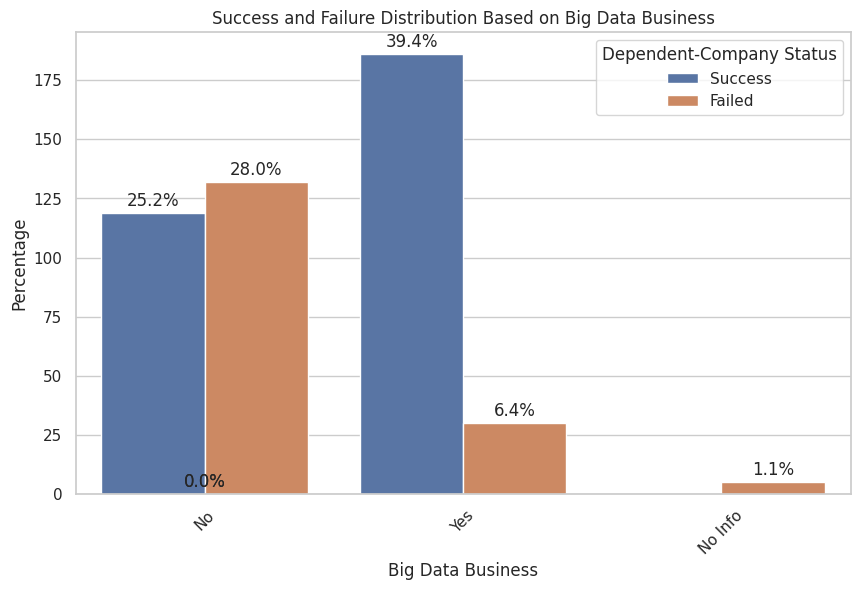

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Big Data Business', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Big Data Business')
plt.xlabel('Big Data Business')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The analysis of big data business engagement reveals significant differences in success rates between companies involved and not involved in this domain. Among successful companies, about 39.4% are engaged in big data business, much higher than the 6.4% of failed companies. Conversely, around 25.2% of successful companies are not involved in big data business, while 28.0% of failed companies are not. These findings highlight the potential impact of big data business involvement on company success, suggesting that engaged companies tend to have higher success rates compared to non-engaged ones.



---



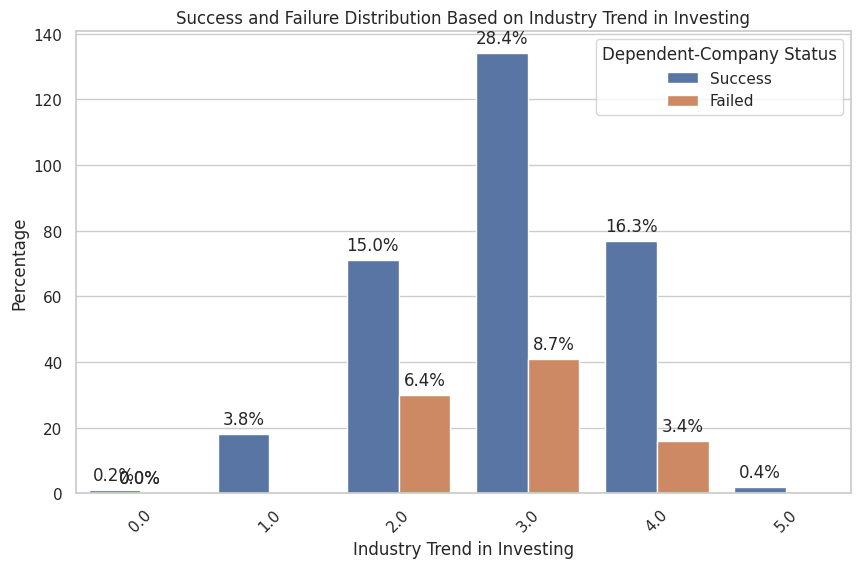

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Industry trend in investing', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Industry Trend in Investing')
plt.xlabel('Industry Trend in Investing')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()



---



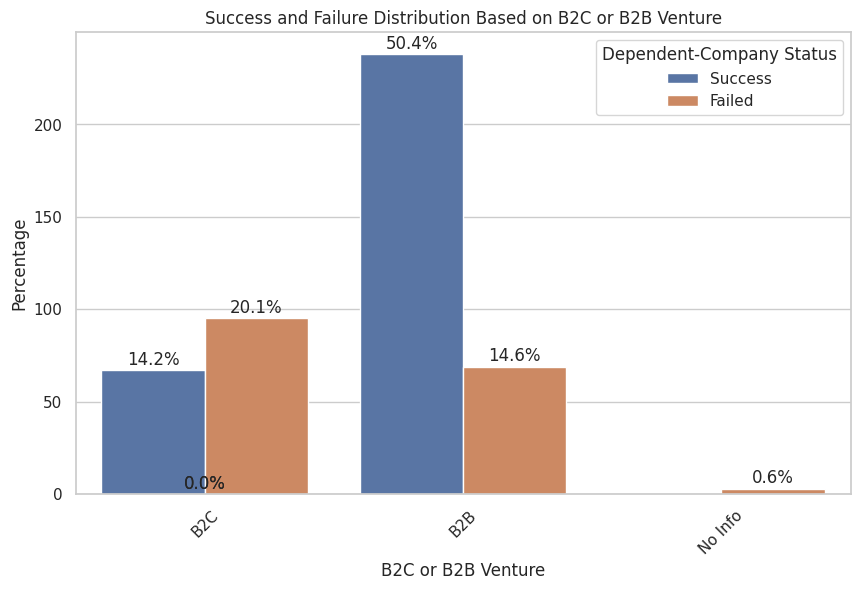

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='B2C or B2B venture?', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on B2C or B2B Venture')
plt.xlabel('B2C or B2B Venture')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The analysis of whether companies operate in a Business-to-Consumer (B2C) or Business-to-Business (B2B) model reveals important insights into their market approach. Successful companies predominantly focus on B2B ventures, constituting approximately 50.4% of cases, whereas B2C ventures represent only around 14.2%. In contrast, failed companies show a higher proportion of B2C ventures (20.1%) compared to B2B ventures (14.6%). This suggests that successful companies prioritize business-to-business relationships, which may play a significant role in their success compared to their business-to-consumer counterparts.



---



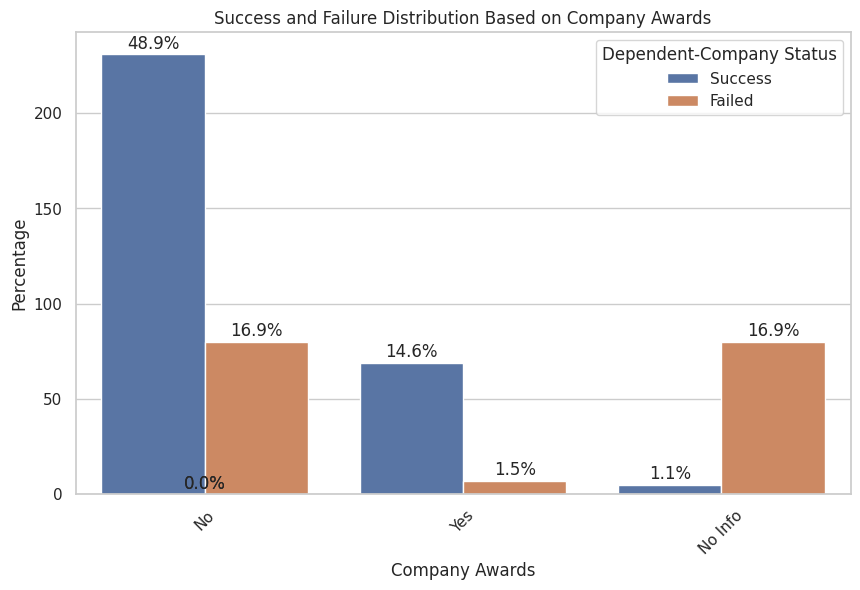

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Company awards', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Company Awards')
plt.xlabel('Company Awards')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The analysis of company awards shows the recognition companies receive. Among successful ventures, about 14.6% have received awards, significantly more than the 1.5% of failed companies. Conversely, a large portion of successful companies, around 48.9%, have not received any awards, while only 16.9% of failed companies fall into this category. These findings suggest that successful ventures are more likely to be recognized through awards compared to unsuccessful ones. Additionally, the lack of awards could be a factor contributing to the failure of certain companies.










---



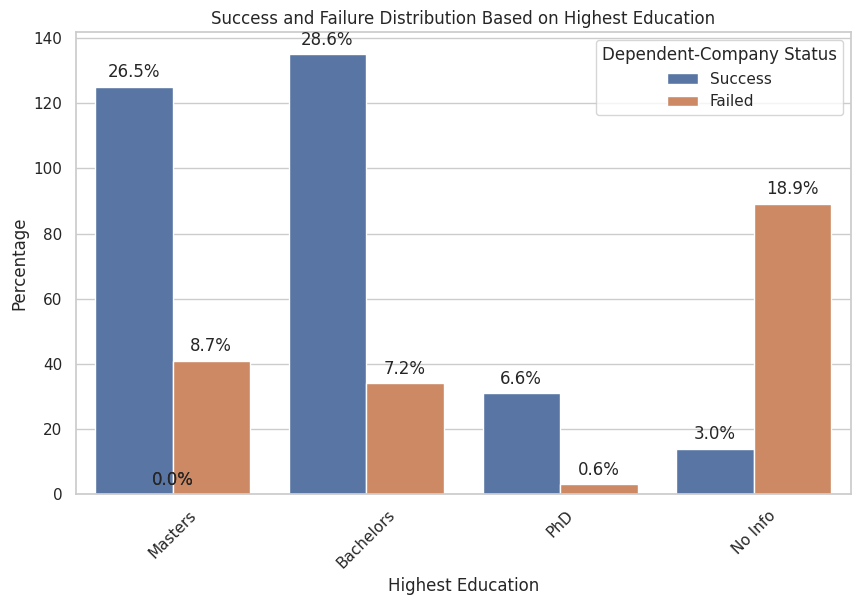

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Highest education', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Highest Education')
plt.xlabel('Highest Education')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

Analysis of the highest education level attained by individuals in successful and failed companies reveals significant differences. In successful companies, 26.5% of individuals have a Master's degree, 28.6% hold a Bachelor's degree, and 6.6% possess a Ph.D. In contrast, the percentages are lower in failed companies, with 8.7% having a Master's degree, 7.2% holding a Bachelor's degree, and only 0.6% possessing a Ph.D. This suggests that individuals with higher educational qualifications, particularly Master's and Ph.D. degrees, are more common in successful companies compared to failed ones.



---



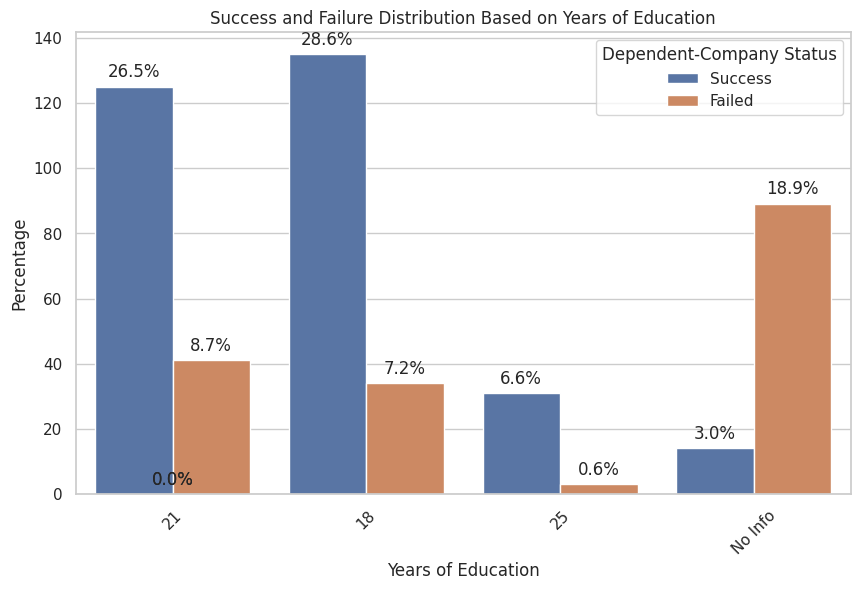

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Years of education', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()



---



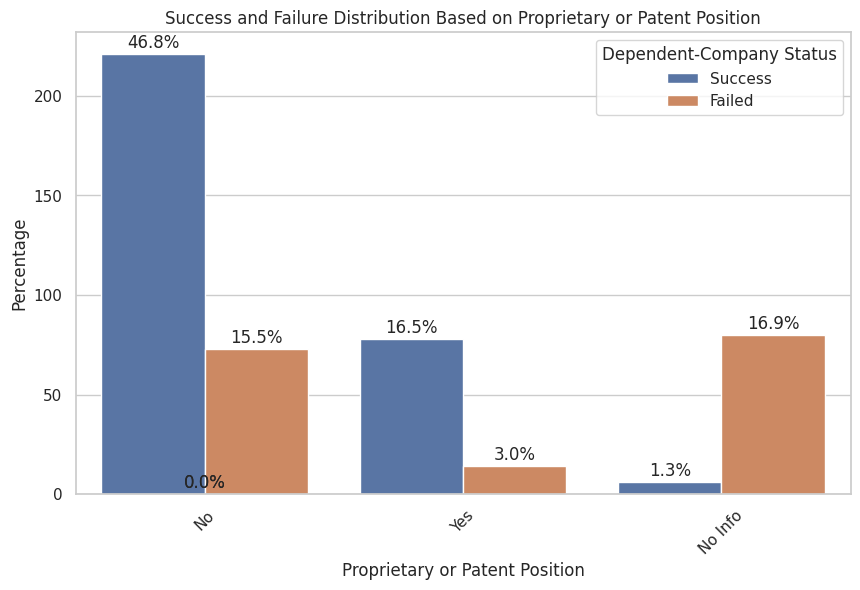

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Proprietary or patent position (competitive position)', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Proprietary or Patent Position')
plt.xlabel('Proprietary or Patent Position')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The examination of proprietary or patent positions, indicating a company's competitive stance, provides valuable insights. Among successful companies, about 16.5% hold a proprietary or patent position, notably higher than the 3.0% among failed companies. Conversely, a larger portion of successful ventures, approximately 46.8%, lack such positions, compared to 15.5% of failed companies. These findings highlight the role of proprietary or patent positions in company success, suggesting that while many successful ventures have them, a significant number thrive without. This emphasizes the importance of other factors in determining company success beyond proprietary or patent positions.



---



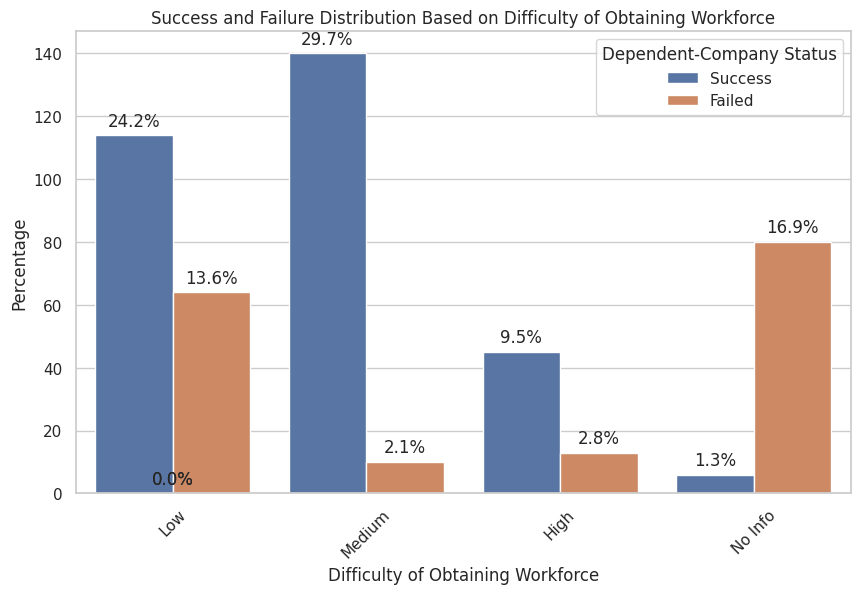

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Dificulty of Obtaining Work force', hue='Dependent-Company Status', data=data)

total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Success and Failure Distribution Based on Difficulty of Obtaining Workforce')
plt.xlabel('Difficulty of Obtaining Workforce')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()



---



#Conclusion:


##Year of Founding
Before 2008, lots of companies failed because of a crisis. But from 2009, things got better, and many companies started to succeed.



##Average size of companies worked for in the past
Successful companies exhibit a greater diversity in past work experiences across different company sizes compared to failed companies.



##Number of Co-founders
The analysis revealed that companies with a unique founder are more prone to failure, whereas those with two founders achieve more success.



##Experience in selling and building products
Having extensive experience in selling and building products significantly boosts a company's chances of success.




##Presence of a top angel or venture fund in previous round of investment
Companies that received investments, either from angel investors or venture funding, were much more successful than those that didn't attract such funding.




##Highest Education and Years of education
In summary, higher education levels, especially Master's and Ph.D. degrees, are more prevalent among individuals in successful companies compared to failed ones, indicating their potential contribution to company success.




##Focus on private or public data?
Companies that use data from public sources instead of private ones are more likely to succeed.




##Focus on structured or unstructured data?
Companies with structured or unstructured data have a higher success rate than those without any data.




##Survival During Recession: Company's Existence Throughout Economic Downturn
Companies who have experienced recession have a lower chance of success than companies who haven't.




##Experience in selling and building products
Our analysis indicates a clear correlation between higher experience in selling and building products and greater company success. Successful companies demonstrate a notable advantage in this area compared to their failed counterparts, suggesting that proficiency in selling and product development plays a significant role in achieving business success.




##Big Data Business
Big data companies have a notably higher success rate compared to non-big data companies, suggesting that involvement in big data activities correlates positively with company success.



##B2C or B2B venture?
B2B companies strive for success rather then B2C.




# Data Processing

In [ ]:
Y = data['Dependent-Company Status']
Y = Y.apply(lambda x: [0, 1] if x == 'Failed' else [1, 0])
Y = np.array(Y.tolist())

In [ ]:
useless_columns = [
    #####################################
    #'Short Description of company profile',
    #'Investors',
    #'Industry of company', 'Focus functions of company',   Keeping these columns yields better results.
    #####################################
                   'Dependent-Company Status',
                   'Company_Name',
                   #'Est. Founding Date',
                   #'year of founding',
                   #'Last Funding Date',
                   #'Continent of company',
                #'Number of Investors in Angel and or VC',
                #'Number of of repeat investors',
                   #'Presence of a top angel or venture fund in previous round of investment',
                #'Crowdsourcing based business',
                #'Crowdfunding based business',
                #"Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?",
                   'Specialization of highest education',
                   'Relevance of education to venture',
                   'Relevance of experience to venture',
                   'Degree from a Tier 1 or Tier 2 university?',
                   'Renowned in professional circle',
                   'Experience in selling and building products',
                   'Experience in Fortune 100 organizations',
                   'Experience in Fortune 500 organizations',
                   'Experience in Fortune 1000 organizations',
                   'Top management similarity',
                #'Number of Recognitions for Founders and Co-founders',
                #'Number of of Research publications',
                #'Skills score',
                   #'Invested through global incubation competitions?',
                   #'Industry trend in investing',
                   'Disruptiveness of technology',
    'Time to maturity of technology (in years)',
    #'Gartner hype cycle stage',
    'Last Funding Amount',
    #'Employees count MoM change',

    #'Number of of advisors',
    #'Gartner hype cycle stage',
    #'Time to maturity of technology (in years)',

                  ]
data = data.drop(useless_columns, axis=1)
data.replace('No Info', np.nan, inplace=True)

In [ ]:
obj_columns = data.select_dtypes(include=['object']).columns

In [ ]:
#getting numerical and categorical columns from columns of type 'object'

def is_numeric(s):
    try:
        float(s)
        return True and not s != s
    except ValueError:
        return False

num_columns = []
cat_columns = []

for obj_curr_column in obj_columns:

  if any(is_numeric(val) for val in data[obj_curr_column] ):
    num_columns.append(obj_curr_column)
  else:
    cat_columns.append(obj_curr_column)

num_columns.extend(data.select_dtypes(include=['float64']).columns)

In [ ]:
list(enumerate(num_columns))

[(0, 'year of founding'),
 (1, 'Age of company in years'),
 (2, 'Number of Investors in Seed'),
 (3, 'Number of Investors in Angel and or VC'),
 (4, 'Team size all employees'),
 (5, 'Number of of repeat investors'),
 (6, 'Years of education'),
 (7, 'Number of Recognitions for Founders and Co-founders'),
 (8, 'Skills score'),
 (9, 'google page rank of company website'),
 (10, 'Number of Direct competitors'),
 (11, 'Employees per year of company existence'),
 (12, 'Last round of funding received (in milionUSD)'),
 (13, 'Time to 1st investment (in months)'),
 (14,
  'Avg time to investment - average across all rounds, measured from previous investment'),
 (15, 'Percent_skill_Entrepreneurship'),
 (16, 'Percent_skill_Operations'),
 (17, 'Percent_skill_Engineering'),
 (18, 'Percent_skill_Marketing'),
 (19, 'Percent_skill_Leadership'),
 (20, 'Percent_skill_Data Science'),
 (21, 'Percent_skill_Business Strategy'),
 (22, 'Percent_skill_Product Management'),
 (23, 'Percent_skill_Sales'),
 (24, '

In [ ]:
columns_to_handle_nan_to_zero =   [*num_columns[2:4], num_columns[5], *num_columns[7:14], *num_columns[29:]]                       #[*num_columns[0:2], *num_columns[6:12], *num_columns[13:17], *num_columns[18:-4]]
columns_to_handle_nan_to_median = [num_columns[0], num_columns[1], num_columns[4], num_columns[6], *num_columns[14:29]]        #[*num_columns[2:6], *num_columns[-4:], num_columns[12], num_columns[17]]

In [ ]:
#handling NaN's
data.loc[:, columns_to_handle_nan_to_zero] = data[columns_to_handle_nan_to_zero].replace({'No Info': 0, np.nan: 0, 'unknown amount': 0})

for col in columns_to_handle_nan_to_median:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert column to numeric, replacing non-numeric values with NaN
    data[col].fillna(data[col].median(), inplace=True)  # Fill NaN values with median of the column

In [ ]:
data[num_columns].head()

,year of founding,Age of company in years,Number of Investors in Seed,Number of Investors in Angel and or VC,Team size all employees,Number of of repeat investors,Years of education,Number of Recognitions for Founders and Co-founders,Skills score,google page rank of company website,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,Internet Activity Score,Employee Count,Employees count MoM change,Industry trend in investing
0,2010.0,4.0,2,0,15.0,4,21.0,0,0,9626884,0,1.5,0.45,0,11.560000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,-1.0,3.0,0.0,2.0
1,2011.0,3.0,5,0,20.0,0,21.0,13,34,1067034,0,6.666666667,5,10,9.000000,15.882353,11.764706,15.000000,12.941176,0.0,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,0.0,8,125.0,0.0,0.0,3.0
2,2011.0,3.0,15,0,10.0,0,18.0,18,36,71391,0,3.333333333,2.35,2,7.344444,9.401709,0.000000,57.478632,0.000000,0.0,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,0.0,9,455.0,14.0,0.0,3.0
3,2009.0,5.0,6,0,50.0,0,18.0,2,15.5,11847,2,10,10.25,1,8.700000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5,-99.0,45.0,10.0,4.0
4,2010.0,4.0,7,0,40.0,0,18.0,5,23,201814,0,10,5.5,13,9.822222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6,496.0,39.0,3.0,3.0


<Axes: >

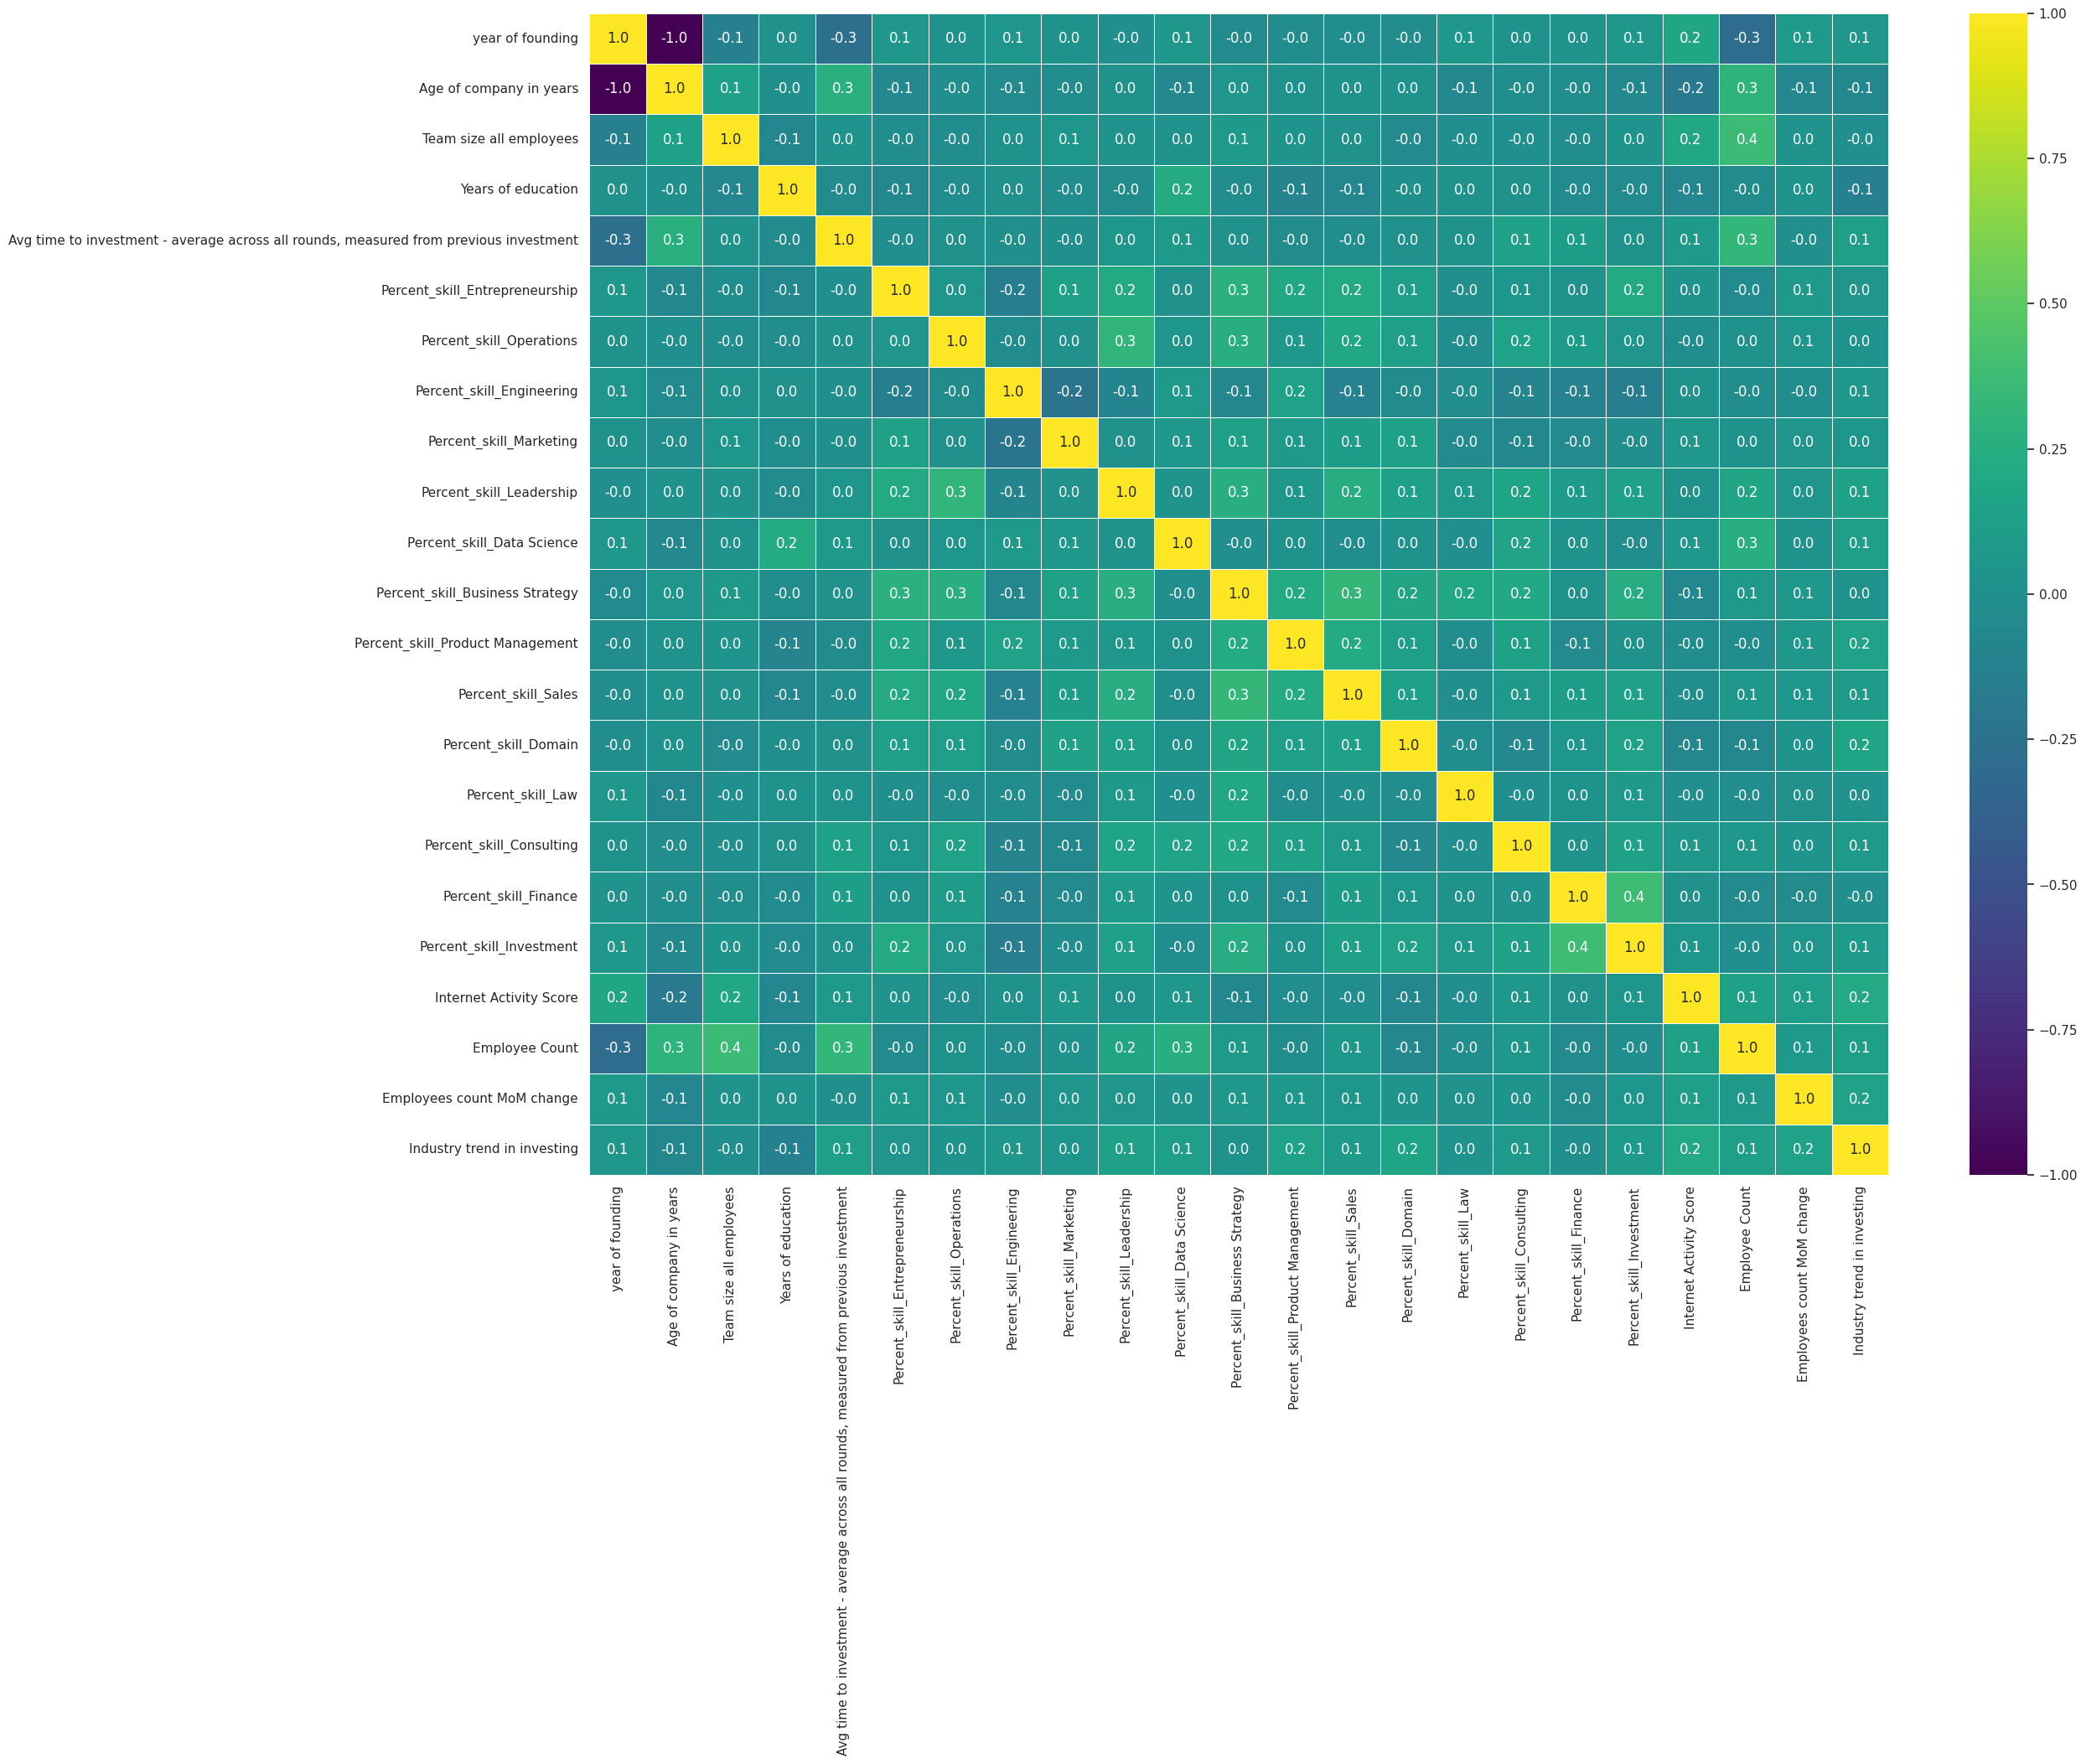

In [ ]:
#correlation plot
plt.figure(figsize = (25, 18))
sns.heatmap(data[num_columns].corr(), annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')

In [ ]:
#Scaling column values
#columns_to_scale = ['google page rank of company website', 'Team size all employees', 'Years of education', 'Avg time to investment - average across all rounds, measured from previous investment']
scaler = MinMaxScaler()
scaler.fit(data[num_columns])  #or use columns
data[num_columns] = scaler.transform(data[num_columns])

In [ ]:
data[num_columns].head()

,year of founding,Age of company in years,Number of Investors in Seed,Number of Investors in Angel and or VC,Team size all employees,Number of of repeat investors,Years of education,Number of Recognitions for Founders and Co-founders,Skills score,google page rank of company website,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,Internet Activity Score,Employee Count,Employees count MoM change,Industry trend in investing
0,0.8125,0.1875,0.083333,0.0,0.002801,0.4,0.428571,0.000000,0.0000,0.429931,0.000000,0.0018,0.0072,0.000000,0.068129,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.320354,0.005051,0.666667,0.4
1,0.8750,0.1250,0.208333,0.0,0.003801,0.0,0.428571,0.021667,0.1700,0.047653,0.000000,0.0080,0.0800,0.064103,0.051613,0.158824,0.235294,0.150000,0.169231,0.0,0.110294,0.435294,0.435294,0.088235,0.0000,0.0,0.0,0.0,0.0,0.727273,0.376106,0.000000,0.666667,0.6
2,0.8750,0.1250,0.625000,0.0,0.001800,0.0,0.000000,0.030000,0.1800,0.003188,0.000000,0.0040,0.0376,0.012821,0.040932,0.094017,0.000000,0.574786,0.000000,0.0,0.048077,0.341880,0.376068,0.000000,0.0625,0.0,0.0,0.0,0.0,0.818182,0.522124,0.023569,0.666667,0.6
3,0.7500,0.2500,0.250000,0.0,0.009802,0.0,0.000000,0.003333,0.0775,0.000529,0.060606,0.0120,0.1640,0.006410,0.049677,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.454545,0.276991,0.075758,0.733333,0.8
4,0.8125,0.1875,0.291667,0.0,0.007802,0.0,0.000000,0.008333,0.1150,0.009013,0.000000,0.0120,0.0880,0.083333,0.056918,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.545455,0.540265,0.065657,0.686667,0.6


In [ ]:
#processing categorical features
data[cat_columns] = data[cat_columns].fillna('No Info')
data[cat_columns].head()

,Short Description of company profile,Industry of company,Focus functions of company,Investors,Has the team size grown,Est. Founding Date,Last Funding Date,Country of company,Continent of company,Presence of a top angel or venture fund in previous round of investment,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Number of of Research publications,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,"Survival through recession, based on existence of the company through recession times",Gartner hype cycle stage
0,Video distribution,No Info,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kleiner Perkins Caufield & Byers|AT&T|Blueprint Ventures|Cisco|Zone Ventures,No,No Info,5/26/2013,United States,North America,Yes,Nothing,No,Small,No,No,No,No,Service,No,Private,No,Both,Yes,Platform,Global,Linear,Yes,None,No,No,No,No,No,No,No,No,No,Yes,Online,B2C,High,High,Yes,Low,Masters,None,Low,Low,Yes,No,High,No Info,No,No,Yes,No,No,No,No Info,No,Yes,No,No Info,No Info
1,No Info,Market Research|Marketing|Crowdfunding,"Marketing, sales",No Info,No,No Info,No Info,United States,North America,No,medium,Yes,Large,Yes,Yes,No,No,Product,No,Public,Yes,Both,No,Platform,Local,Non-Linear,No,Few,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Online,B2C,Low,High,Yes,High,Masters,None,High,Medium,Yes,No,Low,No Info,No,Yes,Yes,No,No,Yes,Medium,Yes,Yes,No,Not Applicable,Trough
2,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partners|Rincon Venture Partners|Pelion Venture Partners|500 Startups|Loren Siebert|Jason Seats|XG Ventures|George Karidis|Sam Choi|Morris Wheeler|Data Collective|Pejman Nozad|Ullas Naik|Dirk Elmendorf|Galvanize|Pat Matthews|Paul Kedrosky|Matt Ocko|Cloud Power Capital|Jared Kopf|Anne Johnson|Issac Roth|George Karutz|Jim Deters|Zachary Aarons|Zack Bogue,No,12/1/2011,10/23/2013,United States,North America,No,low,Yes,Medium,No,No,No,No,Both,Yes,Private,Yes,Both,Yes,cloud,Local,Non-Linear,No,Few,No,No,No,Yes,No,No,Yes,No,No,No,Online,B2B,Low,Medium,Yes,Low,Bachelors,None,High,Medium,Yes,No,Low,No Info,Yes,Yes,Yes,No,No,No,Lo

In [ ]:
encoder = OneHotEncoder()
encoder.fit(data[cat_columns])
one_hot_encoded_output_train = encoder.transform(data[cat_columns])
data.drop(columns=cat_columns, axis=1, inplace=True)
encoded_df = pd.DataFrame(one_hot_encoded_output_train, columns=encoder.get_feature_names_out(cat_columns))
data = pd.concat([data, encoded_df], axis=1)

In [ ]:
#check if there are issues in data or not
data_cleaning_suggestions(data)
%matplotlib inline

There are 2 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


In [ ]:
#cap outliers
cols_with_outliers = ['Number of Co-founders', 'Number of of advisors', 'Team size Senior leadership']

def cap_outliers(col):
  std_deviation = 2
  mean = data[col].mean()
  std = data[col].std()

  upper_threshold = mean + (std_deviation * std)
  lower_threshold = mean - (std_deviation * std)
  data[col] = data[col].clip(lower=lower_threshold, upper=upper_threshold)

for col in cols_with_outliers:
  cap_outliers(col)

# Model Training and Predicting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size= 0.25, random_state = 42)

In [ ]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train.shape, y_train.shape

((354, 1707), (354, 2))

In [ ]:
model = Sequential()

model.add(Dense(units=35,activation='relu',kernel_initializer='GlorotNormal'))
model.add(Dense(units=100,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=150,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=200,activation='relu',kernel_initializer='GlorotNormal'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.FalseNegatives()])

In [ ]:
model.fit(x = x_train, y = y_train, epochs = 150, validation_split=0.1)

Epoch 1/150
10/10 [==============================] - 1s 88ms/step - loss: 0.0049 - binary_accuracy: 0.9969 - false_negatives_4: 1.0000 - val_loss: 0.3719 - val_binary_accuracy: 0.9444 - val_false_negatives_4: 2.0000
Epoch 2/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0018 - binary_accuracy: 1.0000 - false_negatives_4: 0.0000e+00 - val_loss: 0.3214 - val_binary_accuracy: 0.9444 - val_false_negatives_4: 2.0000
Epoch 3/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0164 - binary_accuracy: 0.9969 - false_negatives_4: 1.0000 - val_loss: 0.3378 - val_binary_accuracy: 0.9444 - val_false_negatives_4: 2.0000
Epoch 4/150
10/10 [==============================] - 0s 12ms/step - loss: 0.0073 - binary_accuracy: 0.9969 - false_negatives_4: 1.0000 - val_loss: 0.4283 - val_binary_accuracy: 0.9444 - val_false_negatives_4: 2.0000
Epoch 5/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0017 - binary_accuracy: 1.0000 - false_negatives_4: 0.0000

<Axes: >

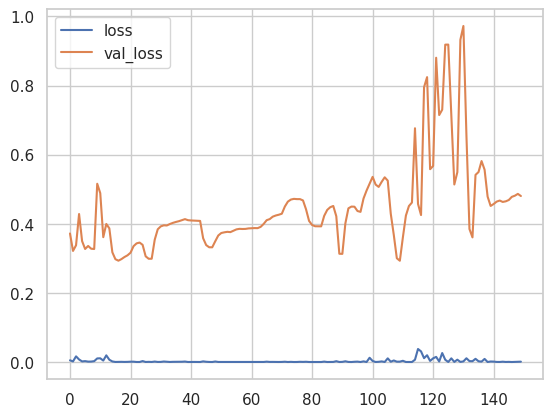

In [ ]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

<Axes: >

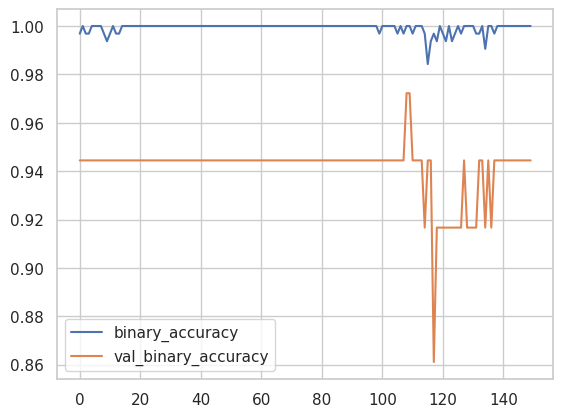

In [ ]:
pd.DataFrame(model.history.history)[['binary_accuracy','val_binary_accuracy']].plot()

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.5496 - binary_accuracy: 0.9237 - false_negatives_4: 9.0000


[0.5495743155479431, 0.9237288236618042, 9.0]

In [ ]:
ypred= np.where(model.predict(x_test) > 0.5, 1, 0)
ypred

4/4 [==============================] - 0s 3ms/step


array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1,

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        79
           1       0.89      0.87      0.88        39

   micro avg       0.92      0.92      0.92       118
   macro avg       0.92      0.91      0.91       118
weighted avg       0.92      0.92      0.92       118
 samples avg       0.92      0.92      0.92       118



In [ ]:
confusion_matrix(y_test[:, 0], ypred[:, 0])

array([[34,  5],
       [ 4, 75]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test[:, 0], ypred[:, 0]).ravel()
(tn, fp, fn, tp)

(34, 5, 4, 75)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred, y_test)

0.07627118644067797